In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5692394004ea39f90f9dfc395d2d0d113e9dd860ae4af360fc1199417f40d8f0
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

import skfuzzy as fuzz

from skfuzzy import control as ctrl


In [ ]:
quality = ctrl.Antecedent(np.arange(0, 15, 1), 'quality')

service = ctrl.Antecedent(np.arange(0, 16, 1), 'service')

tip = ctrl.Consequent(np.arange(0, 28, 1), 'tip')

In [ ]:
quality.automf(3)

service.automf(3)

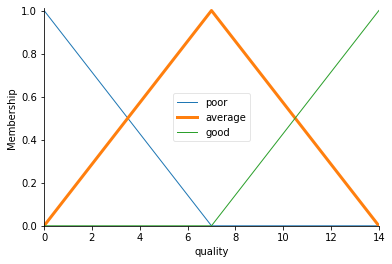

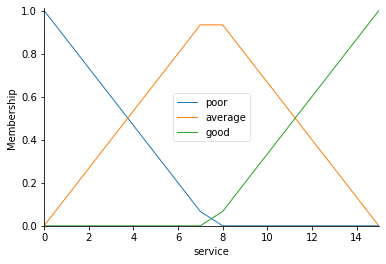

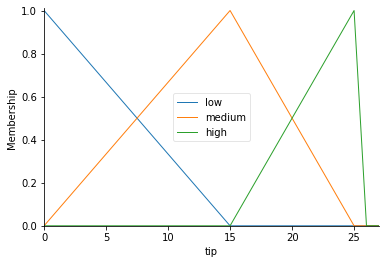

In [ ]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 15])

tip['medium'] = fuzz.trimf(tip.universe, [0, 15, 25])

tip['high'] = fuzz.trimf(tip.universe, [15, 25, 25])

quality['average'].view()

service.view()

tip.view()



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f941bd45490>)

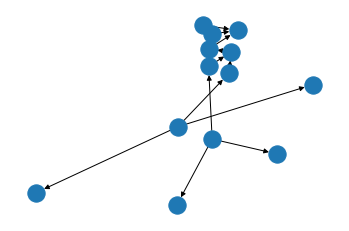

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])

rule2 = ctrl.Rule(service['average'], tip['medium'])

rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality'] = 6.5

tipping.input['service'] = 9.8

13.85325656981483


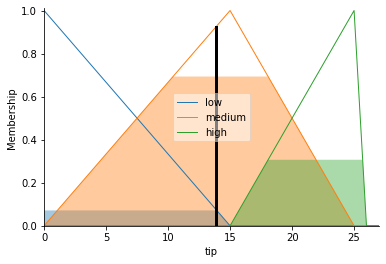

In [ ]:
tipping.compute()

print(tipping.output['tip'])

tip.view(sim=tipping)